<a href="https://colab.research.google.com/github/wsno1-lim/DF-AI2team/blob/main/2.%EC%84%A4%EA%B3%84/5.time_series/polartest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
#import talib as ta # 기술적 분석 (보조지표)
#import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# 크롤링 start_date, end_date
start_date='2013-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2020-12-31'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [5]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install sorted_months_weekdays
!pip install sort_dataframeby_monthorweek
!pip install chart_studio
!pip install FinanceDataReader

ERROR: Could not find a version that satisfies the requirement FinanceDataReader (from versions: none)
ERROR: No matching distribution found for FinanceDataReader


In [11]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
#macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#model_samsung['macd'] = macd
#model_samsung['macdsignal9'] = macdsignal9
#model_samsung['macdhist'] = macdhist

#MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
#MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
#MSCI_KR.columns = ['MSCI_KR']

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)

# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

# [*에너지*]
# WTI유 시세
crude_oil_ = yf.download("CL=F", start=start_date, end=end_date)
crude_oil_.columns = ['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Close','crude_oil_Adj Close','crude_oil_Volume']
crude_oil_ = crude_oil_.drop(['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Adj Close','crude_oil_Volume'], axis=1)

# 브렌트유 시세
brent_crude_oil_ = yf.download("BZ=F", start=start_date, end=end_date)
brent_crude_oil_.columns = ['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Close','brent_crude_oil_Adj Close','brent_crude_oil_Volume']
brent_crude_oil_ = brent_crude_oil_.drop(['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Adj Close','brent_crude_oil_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX = yf.download("SOXX", start=start_date, end=end_date)
SOXX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX = SOXX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

# SMH 인텔(10%), TSMC(10%), 엔비디아(5%)
SMH = yf.download("SMH", start=start_date, end=end_date)
SMH.columns = ['SMH_Open','SMH_High','SMH_Low','SMH_Close','SMH_Adj Close','SMH_Volume']
SMH = SMH.drop(['SMH_Open','SMH_High','SMH_Low','SMH_Close','SMH_Volume'], axis=1)

# SOXL 지수(3배 상승 레버리지) 텍사스인스트루먼트(8.6%) 인텔(8.3%), 퀄컴(7.8%), 엔비디아(7.8%)
SOXL = yf.download("SOXL", start=start_date, end=end_date)
SOXL.columns = ['SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Adj Close','SOXL_Volume']
SOXL = SOXL.drop(['SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Volume'], axis=1)


# SOXS 지수(3배 인버스 레버리지) 텍사스인스트루먼트(8.6%) 인텔(8.3%), 퀄컴(7.8%), 엔비디아(7.8%)
SOXS = yf.download("SOXS", start=start_date, end=end_date)
SOXS.columns = ['SOXS_Open','SOXS_High','SOXS_Low','SOXS_Close','SOXS_Adj Close','SOXS_Volume']
SOXS = SOXS.drop(['SOXS_Open','SOXS_High','SOXS_Low','SOXS_Close','SOXS_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
#model_samsung['MSCI_KR'] = MSCI_KR
model_samsung['SOXX'] = SOXX
model_samsung['SMH'] = SMH
model_samsung['SOXL'] = SOXL
model_samsung['SOXS'] = SOXS
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['TREASURY_10Y']=treasury_10y_
model_samsung['TREASURY_30Y']=treasury_30y_
#model_samsung['crude_oil'] = crude_oil_
#model_samsung['brent_crude_oil'] = brent_crude_oil_
model_samsung['hang_seng'] = hang_seng_

In [13]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

In [14]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close        US    SNP500  ...  TREASURY_10Y  TREASURY_30Y  hang_seng
2013-01-02  0.170634  0.204632  0.002313  ...      0.489945      0.701597   0.336539
2013-01-03  0.159571  0.203493  0.000974  ...      0.511883      0.721890   0.342378
2013-01-04  0.153537  0.200418  0.004091  ...      0.517733      0.723220   0.337827
2013-01-07  0.151861  0.203531  0.002081  ...      0.513346      0.719561   0.337737
2013-01-08  0.145156  0.207099  0.000000  ...      0.501645      0.709914   0.323004

[5 rows x 13 columns]


In [15]:
model_samsung

,Close,US,SNP500,RUSSELL2000,NASDAQ,SOXX,SMH,SOXL,SOXS,TREASURY_5Y,TREASURY_10Y,TREASURY_30Y,hang_seng
날짜,,,,,,,,,,,,,
2013-01-02,31520,1063.50,1462.420044,873.419983,3112.260010,54.310001,30.053631,7.110203,273273.031250,0.763,1.839,3.046,23311.980469
2013-01-03,30860,1063.20,1459.369995,872.599976,3100.570068,53.939999,29.901617,6.983528,275619.093750,0.808,1.899,3.107,23398.599609
2013-01-04,30500,1062.39,1466.469971,879.150024,3101.659912,53.910000,29.722788,6.960070,276932.937500,0.819,1.915,3.111,23331.089844
2013-01-07,30400,1063.21,1461.890015,875.799988,3098.810059,53.720001,29.642307,6.889695,280499.000000,0.813,1.903,3.100,23329.750000
2013-01-08,30000,1064.15,1457.150024,874.700012,3091.810059,53.099998,29.347223,6.662149,288944.906250,0.785,1.871,3.071,23111.189453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,72300,1109.72,3687.260010,1989.880005,12807.919922,372.619995,214.190002,441.500000,19.030001,0.364,0.918,1.653,26119.250000
2020-12-23,73900,1106.65,3690.010010,2007.099976,12771.110352,369.820007,212.589996,432.329987,19.500000,0.377,0.955,1.697,26343.099609
2020-12-28,78700,1095.60,3735.360107,1996.250000,12899.419922,372.709991,214.440002,442.279999,18.990000,0.364,0.933,1.669,26314.630859


In [17]:
#필요없는 열 제거
cols = ['US','SNP500','RUSSELL2000','NASDAQ','SOXX','SMH','SOXL','SOXS','TREASURY_5Y','TREASURY_10Y','TREASURY_30Y','hang_seng']
model_samsung.drop(cols, axis=1, inplace=True)

In [18]:
model_samsung.head()

,Close
날짜,
2013-01-02,31520
2013-01-03,30860
2013-01-04,30500
2013-01-07,30400
2013-01-08,30000


In [19]:
model_samsung.isnull().sum()

Close    0
dtype: int64

In [20]:
model_samsung.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='날짜', length=1832, freq=None)

In [21]:
#MS는인덱스는 해당 월의 마지막 일자로 표시를 시작일로 변경
y = model_samsung['Close'].resample('MS').mean()

In [22]:
#2017년 매출
y['2017':]

날짜
2017-01-01    37500.000000
2017-02-01    38566.315789
2017-03-01    41166.363636
2017-04-01    41971.764706
2017-05-01    45600.000000
2017-06-01    46574.285714
2017-07-01    49633.684211
2017-08-01    46828.571429
2017-09-01    50464.000000
2017-10-01    53961.250000
2017-11-01    55382.000000
2017-12-01    50882.222222
2018-01-01    50051.428571
2018-02-01    47182.352941
2018-03-01    49707.000000
2018-04-01    50324.210526
2018-05-01    51039.473684
2018-06-01    48469.444444
2018-07-01    46257.894737
2018-08-01    45947.727273
2018-09-01    45978.125000
2018-10-01    43426.315789
2018-11-01    43530.000000
2018-12-01    39881.250000
2019-01-01    41545.238095
2019-02-01    46323.333333
2019-03-01    44560.000000
2019-04-01    46097.368421
2019-05-01    43063.157895
2019-06-01    44902.777778
2019-07-01    46247.500000
2019-08-01    43840.476190
2019-09-01    47488.888889
2019-10-01    50047.368421
2019-11-01    52373.684211
2019-12-01    53319.444444
2020-01-01    58616.66666

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


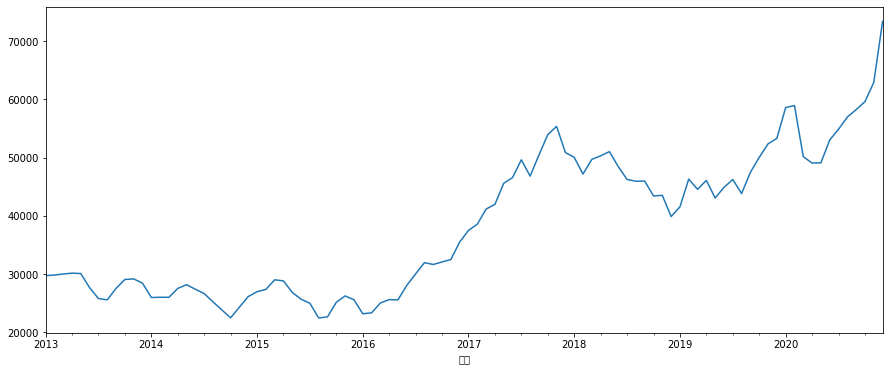

In [23]:
y.plot(figsize = (15,6))
plt.show()

In [24]:
#차트 기본 크기 설정
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


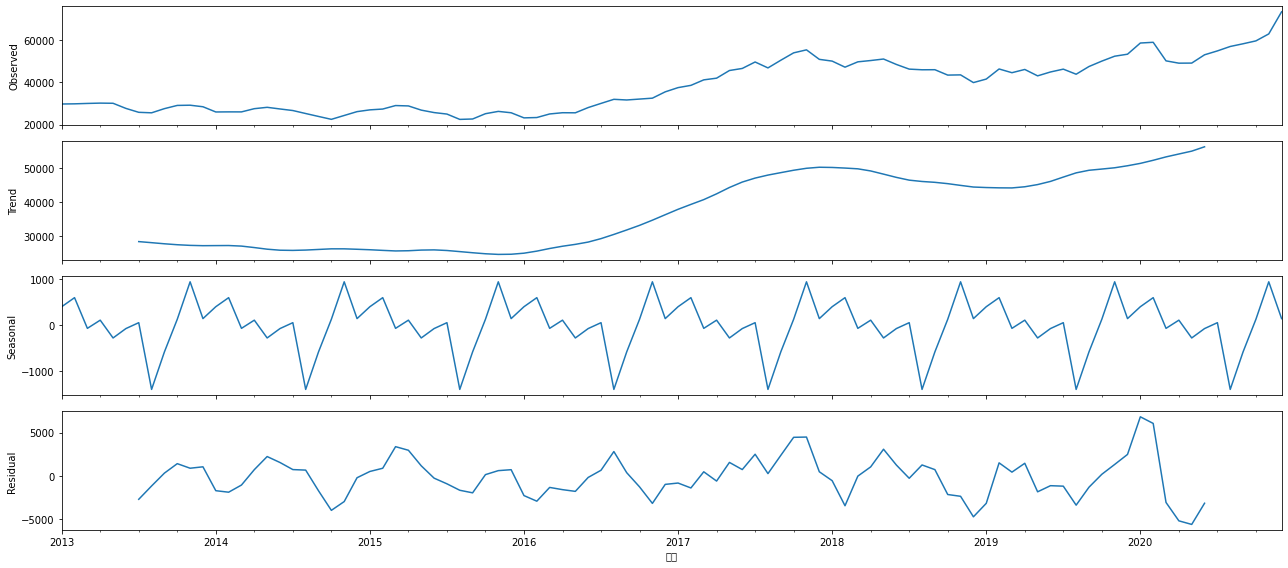

In [25]:
import statsmodels.api as sm #통계분석 기능을 제공하는 파이썬 패키지
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

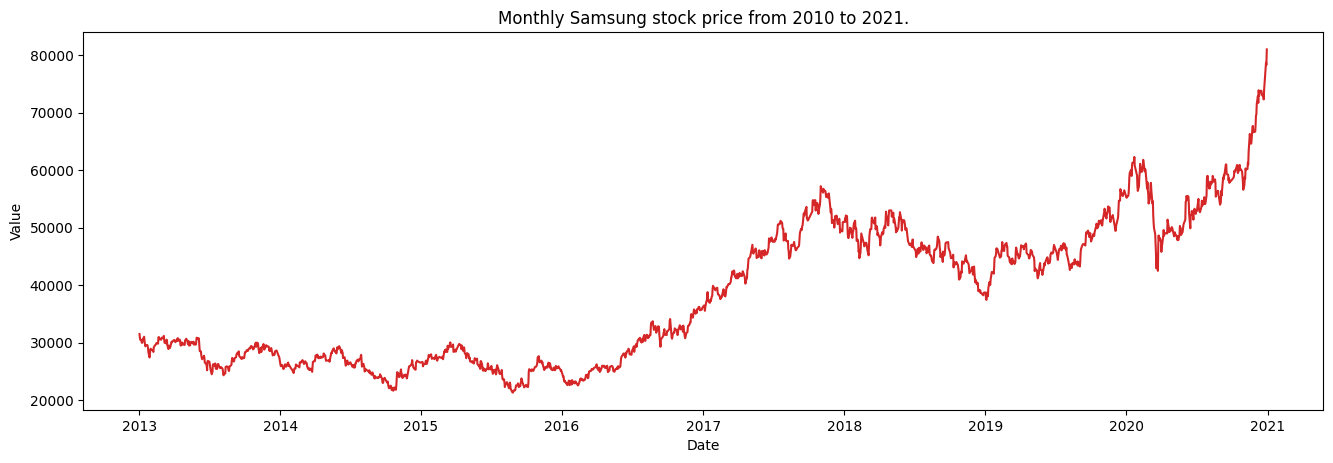

In [26]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(model_samsung, x=model_samsung.index, y=model_samsung['Close'], title='Monthly Samsung stock price from 2010 to 2021.')

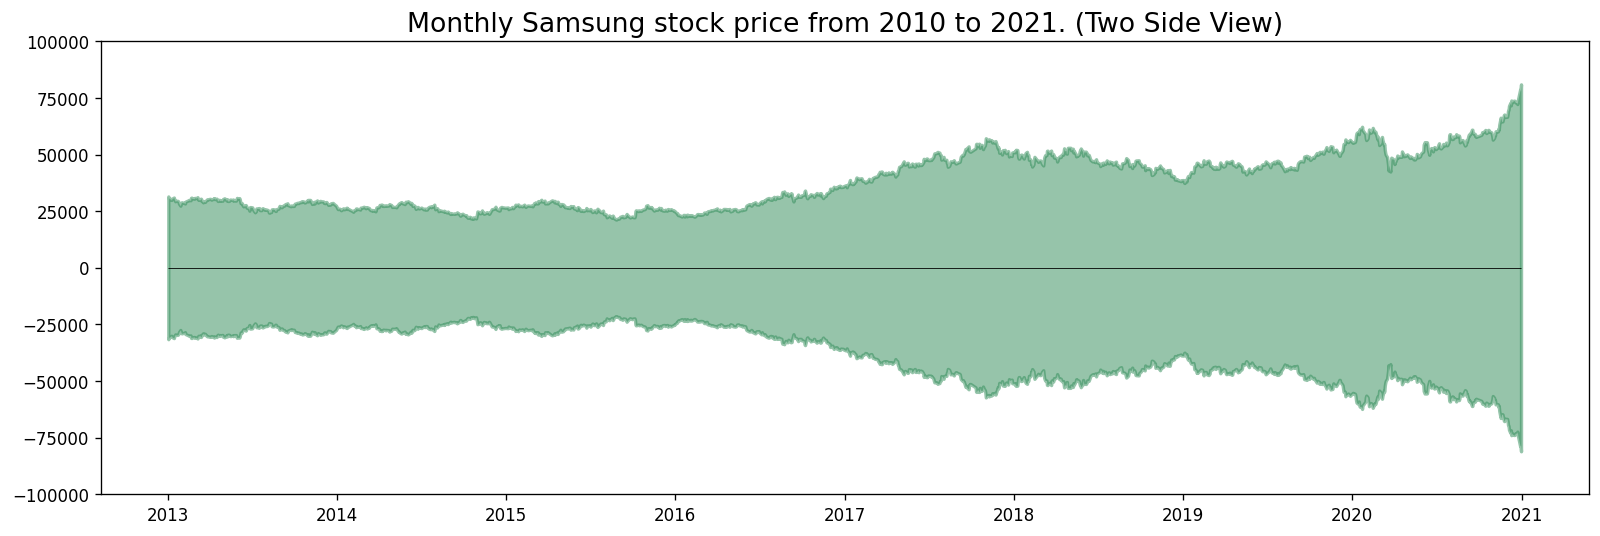

In [27]:
x = model_samsung.index.values
y1 = model_samsung['Close'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-100000, 100000)
plt.title('Monthly Samsung stock price from 2010 to 2021. (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(model_samsung.index.values), xmax=np.max(model_samsung.index.values), linewidth=.5)
plt.show()

In [28]:
#MS는인덱스는 해당 월의 마지막 일자로 표시를 시작일로 변경
#model_samsung1 = model_samsung['Close'].resample('MS').mean()

In [29]:
#인덱스 컬럼(date)를 데이터 컬럼으로 바꾸고 순번으로 인덱스 변경
#model_samsung1.reset_index(inplace=True)

In [30]:
model_samsung.reset_index(inplace=True)

In [31]:
model_samsung.rename(columns={'날짜': 'date', 
                           'Close': 'close'}, inplace=True)

In [32]:
model_samsung

,date,close
0,2013-01-02,31520
1,2013-01-03,30860
2,2013-01-04,30500
3,2013-01-07,30400
4,2013-01-08,30000
...,...,...
1827,2020-12-22,72300
1828,2020-12-23,73900
1829,2020-12-28,78700
1830,2020-12-29,78300


In [33]:
import matplotlib as mpl

#date컬럼에서 년도, 월을 분리
model_samsung['year'] = [d.year for d in model_samsung['date']]
model_samsung['month'] = [d.strftime('%b') for d in model_samsung['date']]
model_samsung['y_m'] = [d.strftime('%y%m') for d in model_samsung['date']]
years = model_samsung['year'].unique()

In [34]:
result=model_samsung.groupby(['year','month'], as_index=False).mean()

In [35]:
years = result['year'].unique()

In [36]:
result

,year,month,close
0,2013,Apr,30157.000000
1,2013,Aug,25566.000000
2,2013,Dec,28436.666667
3,2013,Feb,29818.750000
4,2013,Jan,29737.142857
...,...,...,...
91,2020,Mar,50168.181818
92,2020,May,49113.888889
93,2020,Nov,62926.315789
94,2020,Oct,59629.411765


In [55]:
list=["19","18","17","16","15","14","13"]

df20=result[result['year']==2020]
df20.rename(columns={'year': 'year','month': 'month','close': '20close'}, inplace=True)

for i in list :
    df=result[result['year']==pd.to_numeric("20"+i)]
    df.rename(columns={'year': 'year','month': 'month','close': i+'close'}, inplace=True)
    df20 = pd.merge(df20, df, left_on="month", right_on='month', how='left')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is 

In [56]:
df20.drop(['year_x', 'year_y'], axis=1)
df20.fillna(df20['13close'].mean())

,year_x,month,20close,year_y,19close,year_x,18close,year_y,17close,year_x,16close,year_y,15close,year_x,14close,year_y,13close
0,2020,Apr,49075.000000,2019,46097.368421,2018,50324.210526,2017,41971.764706,2016,25607.368421,2015,28828.421053,2014,27524.000000,2013,30157.000000
1,2020,Aug,56980.000000,2019,43840.476190,2018,45947.727273,2017,46828.571429,2016,31956.190476,2015,22450.000000,2014,25229.000000,2013,25566.000000
2,2020,Dec,73410.000000,2019,53319.444444,2018,39881.250000,2017,50882.222222,2016,35498.947368,2015,25591.428571,2014,26124.210526,2013,28436.666667
3,2020,Feb,58957.894737,2019,46323.333333,2018,47182.352941,2017,38566.315789,2016,23331.764706,2015,27347.500000,2014,26010.000000,2013,29818.750000
4,2020,Jan,58616.666667,2019,41545.238095,2018,50051.428571,2017,37500.000000,2016,23173.684211,2015,26966.000000,2014,25965.263158,2013,29737.142857
5,2020,Jul,54880.952381,2019,46247.500000,2018,46257.894737,2017,49633.684211,2016,30023.157895,2015,24973.333333,2014,26646.000000,2013,25799.000000
6,2020,Jun,53038.095238,2019,44902.777778,2018,48469.444444,2017,46574.285714,2016,28056.000000,2015,25679.090909,2014,27387.777778,2013,27653.333333
7,2020,Mar,50168.181818,2019,44560.000000,2018,49707.000000,2017,41166.363636,2016,25022.000000,2015,29003.636364,2014,26000.000000,2013,30007.368421
8,2020,May,49113.888889,2019,43063.157895,2018,51039.473684,2017,45600.000000,2016,25570.000000,2015,26837.777778,2014,28170.000000,2013,30080.000000
9,2020,Nov,62926.315789,2019,52373.684211,2018,43530.000000,2017,55382.000000,2016,32503.000000,2015,26239.000000,2014,24304.444444,2013,29166.315789


In [57]:
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [58]:
df20=Sort_Dataframeby_Month(df=df20,monthcolumnname='month')

In [59]:
df20

,year_x,month,20close,year_y,19close,year_x,18close,year_y,17close,year_x,16close,year_y,15close,year_x,14close,year_y,13close
0,2020,Jan,58616.666667,2019,41545.238095,2018,50051.428571,2017,37500.000000,2016,23173.684211,2015,26966.000000,2014,25965.263158,2013,29737.142857
1,2020,Feb,58957.894737,2019,46323.333333,2018,47182.352941,2017,38566.315789,2016,23331.764706,2015,27347.500000,2014,26010.000000,2013,29818.750000
2,2020,Mar,50168.181818,2019,44560.000000,2018,49707.000000,2017,41166.363636,2016,25022.000000,2015,29003.636364,2014,26000.000000,2013,30007.368421
3,2020,Apr,49075.000000,2019,46097.368421,2018,50324.210526,2017,41971.764706,2016,25607.368421,2015,28828.421053,2014,27524.000000,2013,30157.000000
4,2020,May,49113.888889,2019,43063.157895,2018,51039.473684,2017,45600.000000,2016,25570.000000,2015,26837.777778,2014,28170.000000,2013,30080.000000
5,2020,Jun,53038.095238,2019,44902.777778,2018,48469.444444,2017,46574.285714,2016,28056.000000,2015,25679.090909,2014,27387.777778,2013,27653.333333
6,2020,Jul,54880.952381,2019,46247.500000,2018,46257.894737,2017,49633.684211,2016,30023.157895,2015,24973.333333,2014,26646.000000,2013,25799.000000
7,2020,Aug,56980.000000,2019,43840.476190,2018,45947.727273,2017,46828.571429,2016,31956.190476,2015,22450.000000,2014,25229.000000,2013,25566.000000
8,2020,Sep,58260.000000,2019,47488.888889,2018,45978.125000,2017,50464.000000,2016,31644.444444,2015,22638.888889,2014,23842.222222,2013,27542.352941
9,2020,Oct,59629.411765,2019,50047.368421,2018,43426.315789,2017,53961.250000,2016,32073.333333,2015,25149.473684,2014,22475.789474,2013,29066.315789


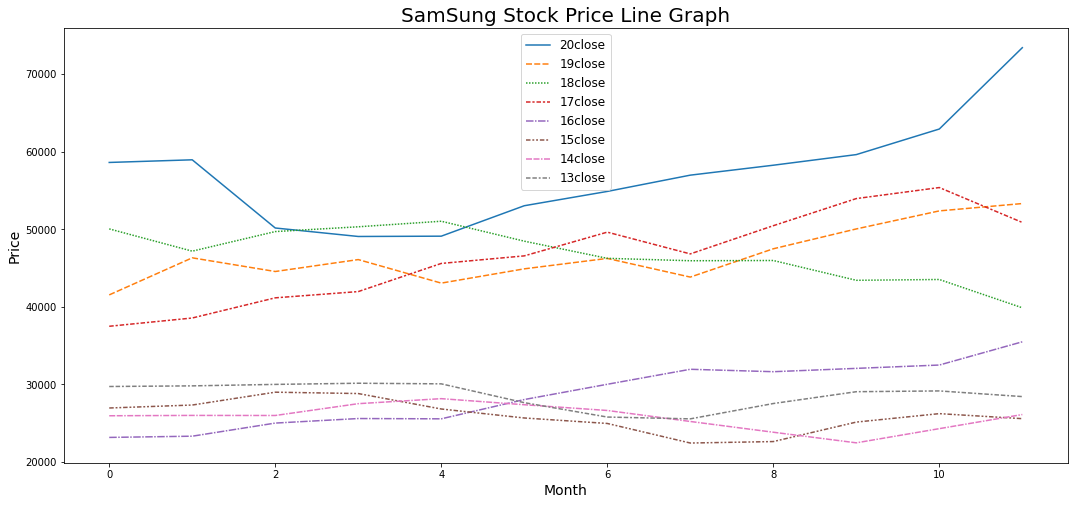

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=df20[['20close', '19close', '18close', '17close', '16close', '15close', '14close', '13close']])

plt.title('SamSung Stock Price Line Graph', fontsize=20)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [61]:
# 각 연도별 라인의 색을 무작위로 지정
#np.random.seed(100)
#mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# 도표그리기
#plt.rcParams['font.family']='Malgun Gothic'
#plt.figure(figsize=(16,8), dpi= 120)
#for i, y in enumerate(years):
#    if i > 0:
#        plt.plot('month', 'close', data=result[result.year==y], color=mycolors[i], label=y)
#        plt.text(result[result.year==y].shape[0]-0.9, result.loc[result.year==y, 'close'][-1:].values[0], y, fontsize=12, color=mycolors[i])

 # 분칠하기
#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='삼성전자주가', xlabel='월')
#plt.yticks(fontsize=12, alpha=.7)
#plt.title("계절별 삼성주가 분석", fontsize=20)
#plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48149 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49828 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54364 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

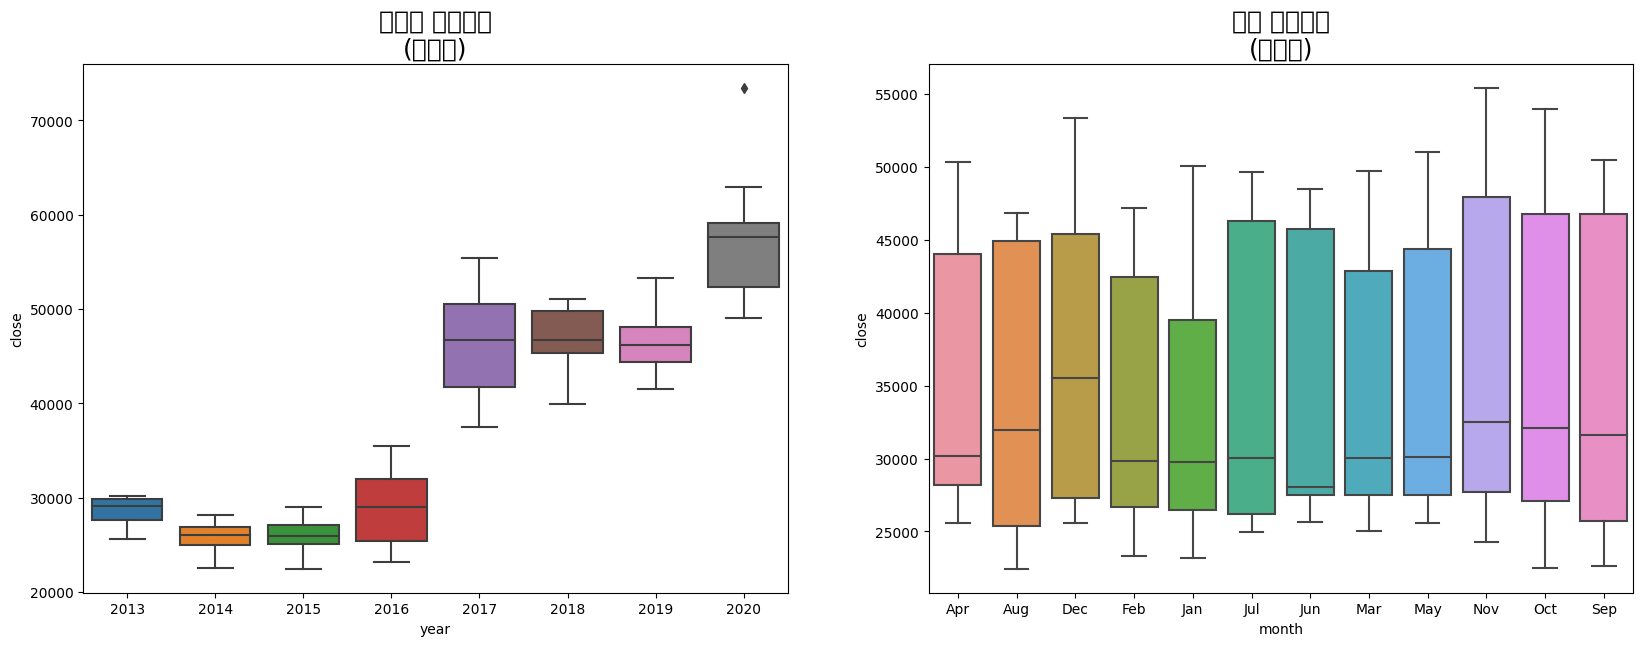

In [77]:
import seaborn as sns
# 도표 작성
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 100)
sns.boxplot(x='year', y='close', data=result, ax=axes[0])
sns.boxplot(x='month', y='close', data=result.loc[~result.year.isin([2010, 2020])], ax=axes[1])

 # 제목 설정
axes[0].set_title('년도별 박스도표\n(트렌드)', fontsize=18)
axes[1].set_title('월별 박스도표\n(계절성)', fontsize=18)
plt.show()

In [75]:
import plotly.graph_objects as go
import plotly.express as px

In [76]:
fig = px.line_polar(result, r="close", theta="month", color="year", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()